<a href="https://colab.research.google.com/github/Chinmayee29/googlecolab/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv(r'/processed_cleveland.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
print("Shape of dataset:",df.shape)
print("\n Missing values:\n",df.isnull().sum())

Shape of dataset: (303, 14)

 Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


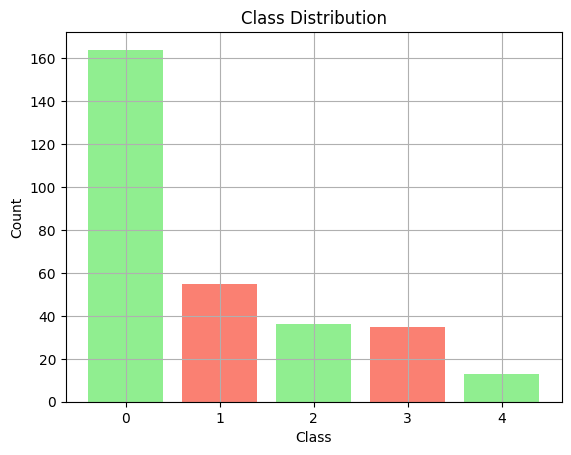

In [ ]:
#count target classes
class_counts=df['num'].value_counts()
# print(class_counts)
#Bar Charts
plt.bar(class_counts.index,class_counts.values,color=['lightgreen','salmon'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(True)
plt.show()

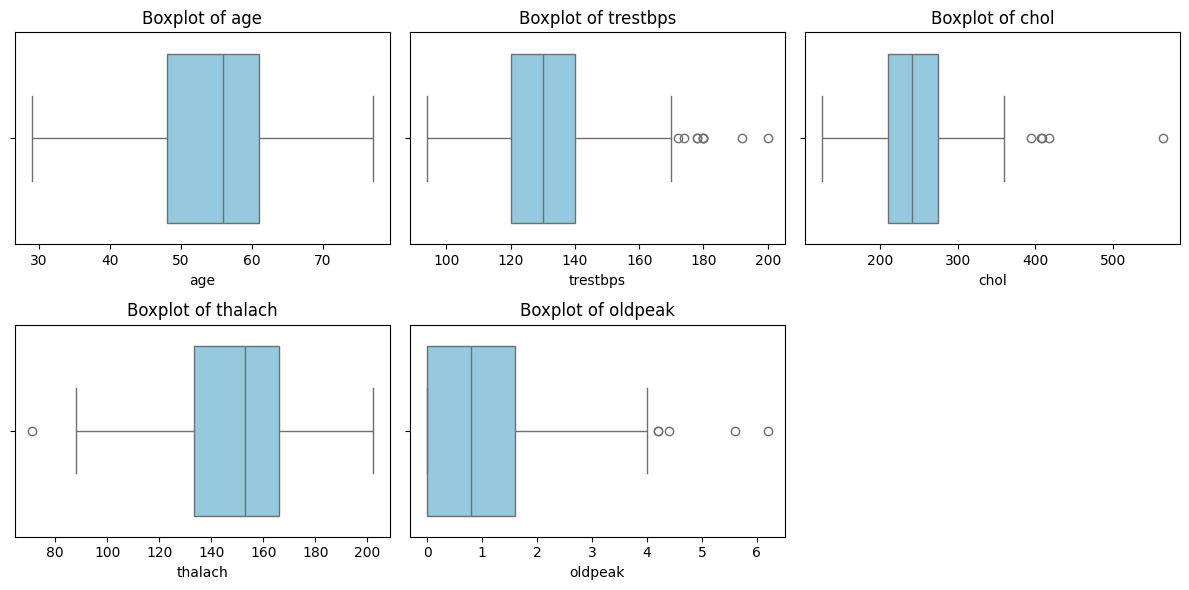

In [ ]:
#outliervisualization - boxplots
plt.figure(figsize=(12,6))
numerical_features=['age','trestbps','chol','thalach','oldpeak']
for i,col in enumerate(numerical_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#Select Features and targets
X=df.drop(['num'],axis=1)
y=df['num']
print("Input Shape:",X.shape)
print("Target Shape:",y.shape)

Input Shape: (303, 13)
Target Shape: (303,)


In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

ValueError: could not convert string to float: '?'

In [ ]:
# Replace '?' with NaN
X = X.replace('?', np.nan)

# Convert 'ca' and 'thal' columns to numeric, coercing errors
X['ca'] = pd.to_numeric(X['ca'], errors='coerce')
X['thal'] = pd.to_numeric(X['thal'], errors='coerce')

# Impute missing values with the mean
X = X.fillna(X.mean())

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,0.00
